In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


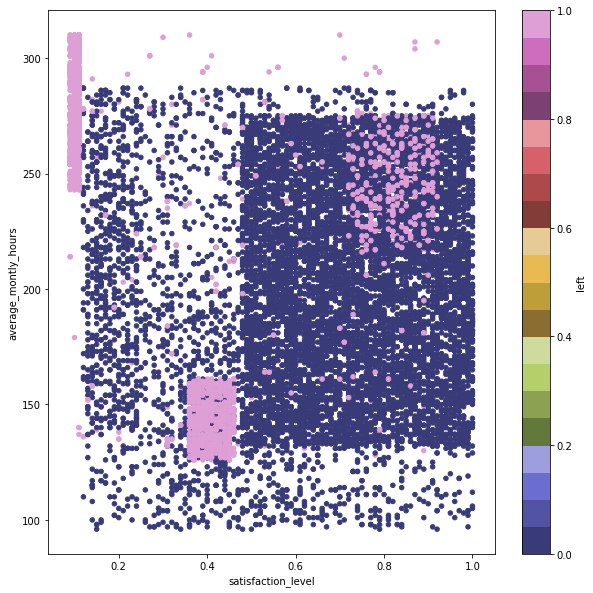

In [23]:
df.plot(x="satisfaction_level",y="average_montly_hours",kind="scatter",c="left",colormap="tab20b",figsize=(10,10),sharex=False,sharey=False)
plt.show()

In [24]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [25]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [26]:
df.groupby("sales").mean()["left"]

sales
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64

In [27]:
df.groupby("salary").mean()["left"]

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

In [28]:
pd.crosstab(df["number_project"],df["left"])

left,0,1
number_project,,
2,821,1567
3,3983,72
4,3956,409
5,2149,612
6,519,655
7,0,256


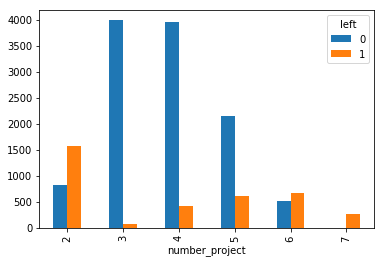

In [29]:
pd.crosstab(df["number_project"],df["left"]).plot(kind="bar")
plt.show()

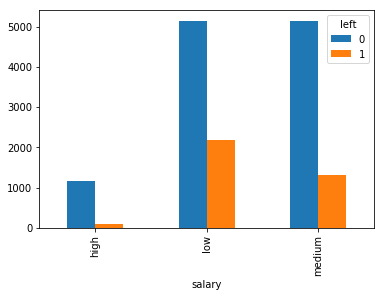

In [30]:
pd.crosstab(df["salary"],df["left"]).plot(kind="bar")
plt.show()

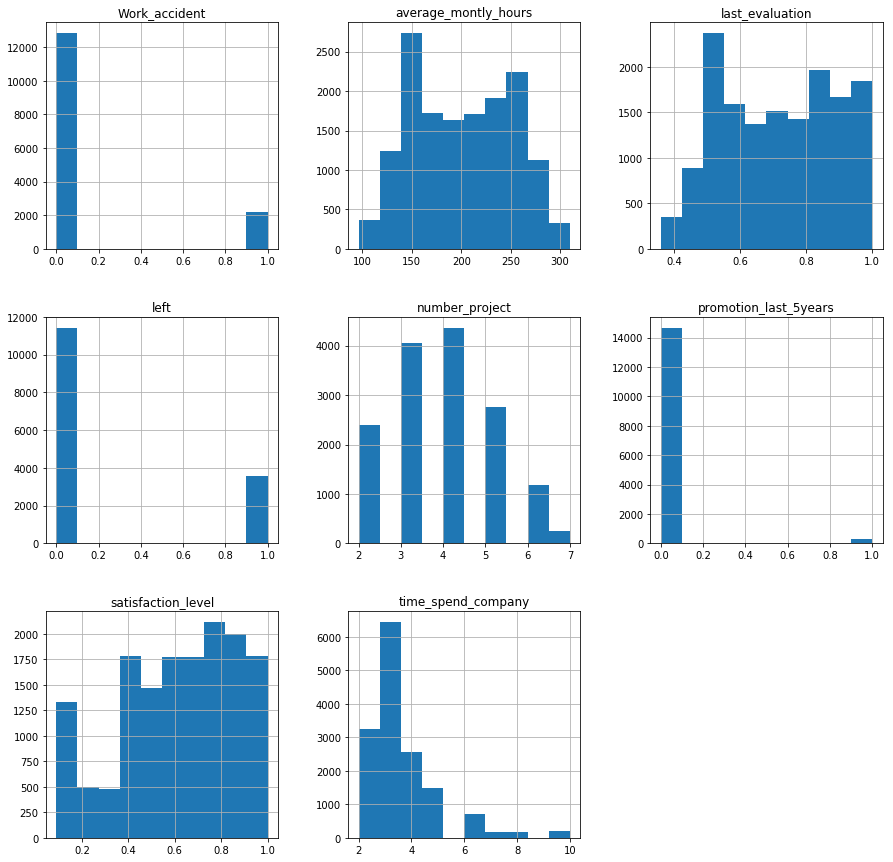

In [31]:
df.hist(bins=10,figsize=(15,15))
plt.show()

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["salary"])
df["salary"]=le.transform(df["salary"])

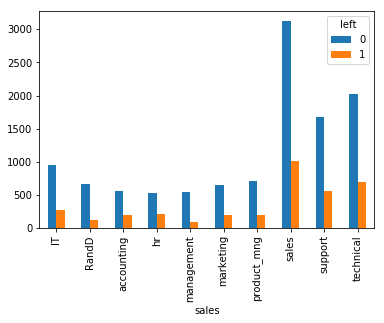

In [33]:
pd.crosstab(df["sales"],df["left"]).plot(kind="bar")
plt.show()

In [34]:
le.fit(df["sales"])
df["sales"]=le.transform(df["sales"])

In [35]:
df["sales"]

0        7
1        7
2        7
3        7
4        7
5        7
6        7
7        7
8        7
9        7
10       7
11       7
12       7
13       7
14       7
15       7
16       7
17       7
18       7
19       7
20       7
21       7
22       7
23       7
24       7
25       7
26       7
27       7
28       2
29       2
        ..
14969    7
14970    7
14971    7
14972    2
14973    2
14974    2
14975    3
14976    3
14977    3
14978    3
14979    9
14980    9
14981    9
14982    9
14983    9
14984    9
14985    9
14986    9
14987    9
14988    9
14989    9
14990    8
14991    8
14992    8
14993    8
14994    8
14995    8
14996    8
14997    8
14998    8
Name: sales, Length: 14999, dtype: int64

In [36]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                      int64
salary                     int64
dtype: object

In [37]:
y=df["left"]
df.drop(["left"],inplace=True,axis=1)
x=df

In [43]:
x.groupby("").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,sales,salary
time_spend_company,,,,,,,,
2,0.697078,0.717596,3.687423,200.133169,0.172010,0.016646,5.916769,1.342478
3,0.626314,0.668721,3.327798,186.632935,0.138910,0.020798,5.868850,1.341145
4,0.467517,0.767927,4.627689,223.455221,0.124364,0.013688,5.869378,1.356277
5,0.610305,0.813666,4.519348,222.978955,0.116090,0.011541,5.871012,1.367957
6,0.603440,0.754875,4.213092,212.051532,0.149025,0.023677,5.981894,1.383008
7,0.635957,0.682766,3.851064,200.744681,0.138298,0.191489,5.797872,1.404255
8,0.665062,0.711975,3.777778,193.802469,0.271605,0.061728,5.074074,1.407407
10,0.655327,0.731495,3.682243,199.224299,0.233645,0.074766,5.523364,1.140187


In [20]:
y.dtypes

dtype('int64')

In [21]:
x.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
sales                      int64
salary                     int64
dtype: object

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [50]:
clf=RandomForestClassifier(n_jobs=1,n_estimators=20)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.98787878787878791